# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS
---

## Data Gathering

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


There seem to be dummy columns for month feature

## Data Exploration

In [3]:
# Getting feature inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

day feature has dummies as well

Let us remove these dummies, to keep our data simple for now : 

In [4]:
# Dropping dummy columns
df.drop(columns = df.iloc[:, 11:30].columns, inplace=True)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [5]:
# Checking for na values
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

No na values

In [6]:
# Checking for duplicate samples
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


We have 8 duplicate entries, which we will remove

In [7]:
# Dropping duplicates
df.drop_duplicates(inplace=True, ignore_index=True)

In [8]:
# Stats on numeric features
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [9]:
# Checking unique values for each feature
df.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
size_category      2
dtype: int64

month, day, size_category are categorical features. The rest are numeric. However, it is surprising to see so few unique values for rain. This feature needs to be explored more.

In [10]:
# Checking relationship between area and size_category
df.groupby('size_category').area.agg('describe')

,count,mean,std,min,25%,50%,75%,max
size_category,,,,,,,,
large,138.0,45.617971,117.364722,6.04,8.745,14.625,36.9775,1090.84
small,371.0,0.857439,1.489998,0.00,0.000,0.000,1.4050,5.97


It is clear that size_category has been created by cutting area on the value 6. We will eleminate feature area

## Data Visualization

In [11]:
# Defining categorical features
categorical_features = ['month', 'day', 'size_category']

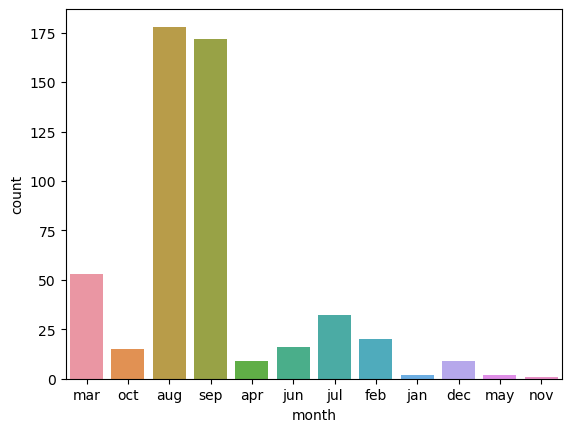

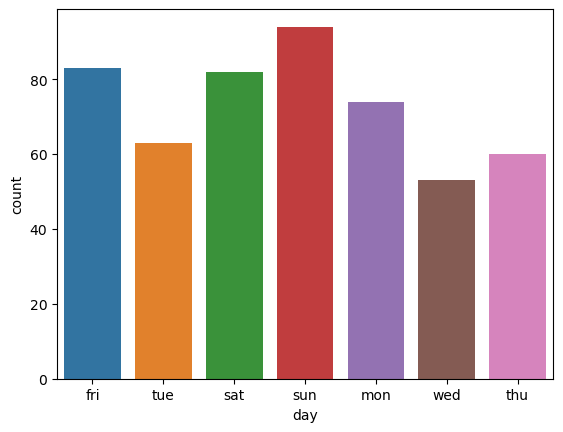

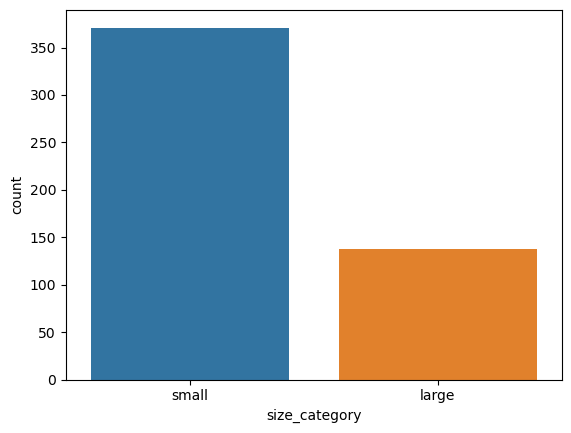

In [12]:
# Plotting countplot for all categorical features
for col in categorical_features:
    sns.countplot(df, x = col)
    plt.show()

Majority of fires are from August and September. Size category feature is very imbalanced with small having 70% which large having 30%. With days, we see that friday, saturday, sunday, monday has higher values.

In [13]:
# Defining continuous features
continuous_features = [col for col in df.columns if col not in categorical_features]

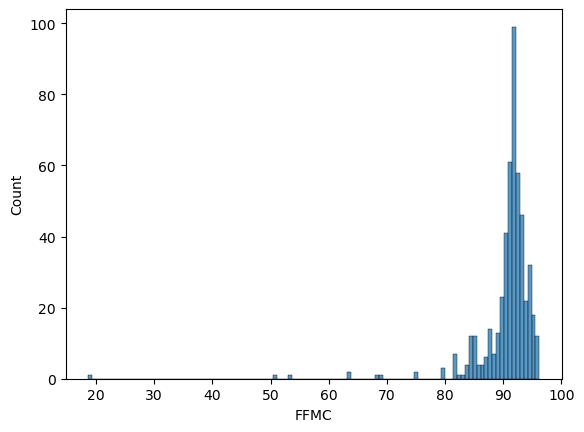

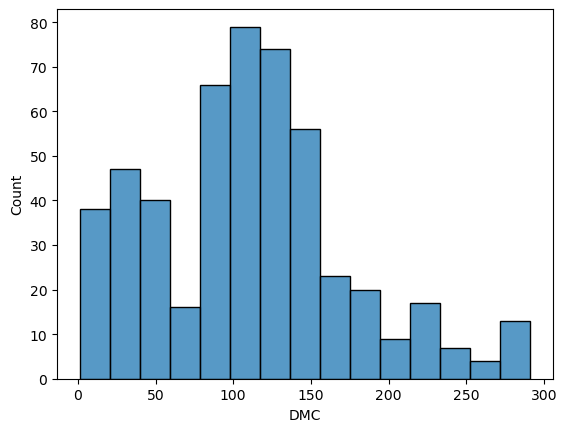

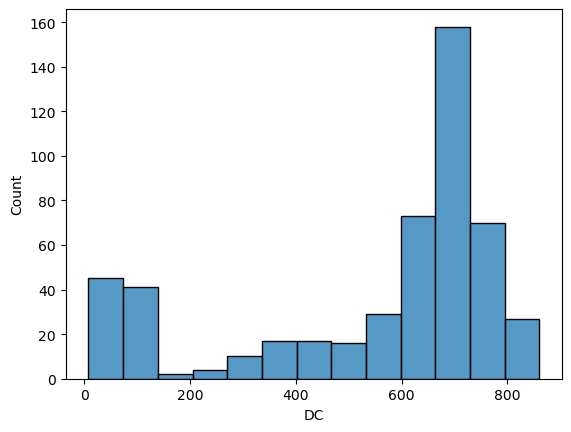

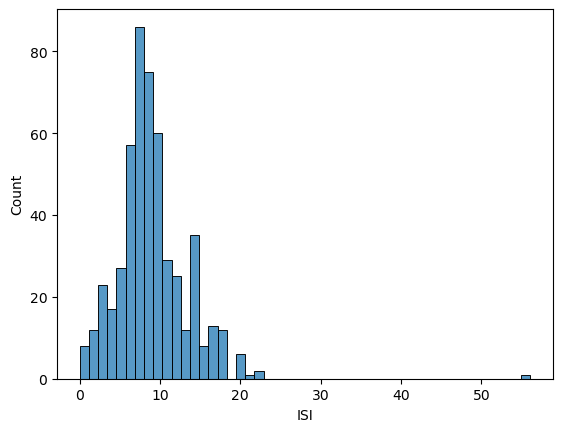

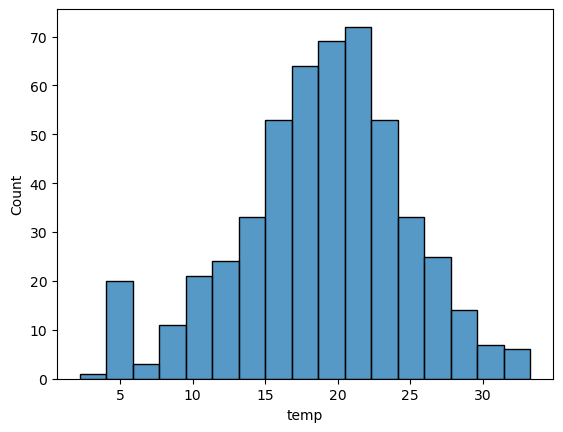

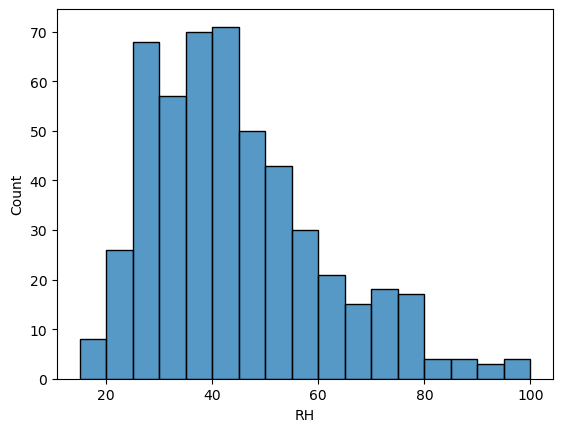

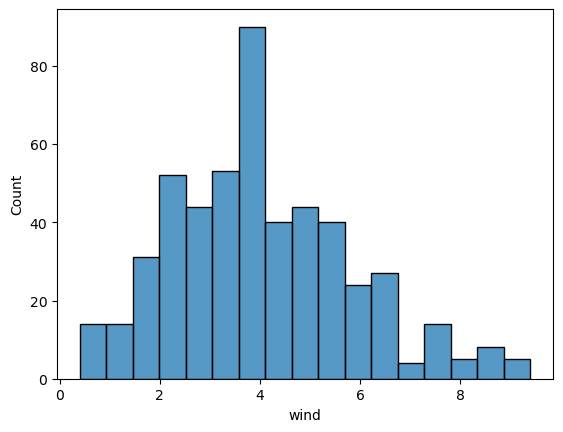

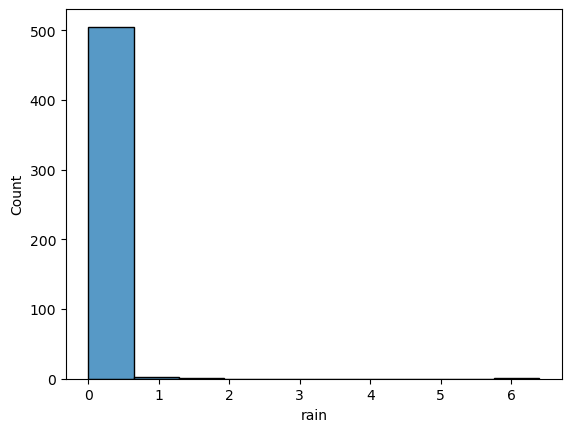

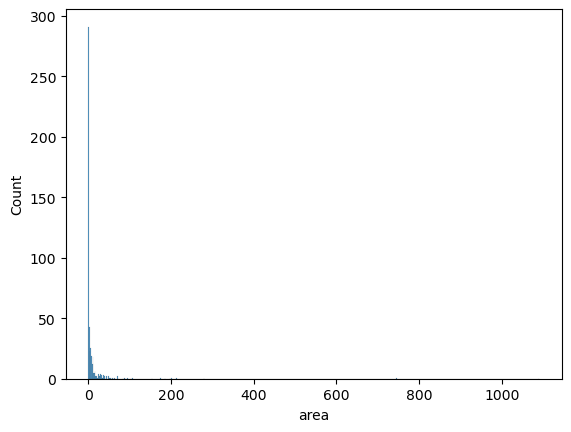

In [14]:
# Plotting histplot for all categorical features
for col in continuous_features:
    sns.histplot(df, x = col)
    plt.show()

Area, rain, ffmc, and dc are very skewed

As rain and area are dominated by a single value, we will check the distribution without the dominating value

In [15]:
# Value counts for rain
df.rain.value_counts()

0.0    502
0.2      2
1.0      1
6.4      1
0.8      1
0.4      1
1.4      1
Name: rain, dtype: int64

In [16]:
# Value counts for area
df.area.value_counts()

0.00      240
1.94        3
1.46        2
9.96        2
11.06       2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

<Axes: xlabel='area', ylabel='Count'>

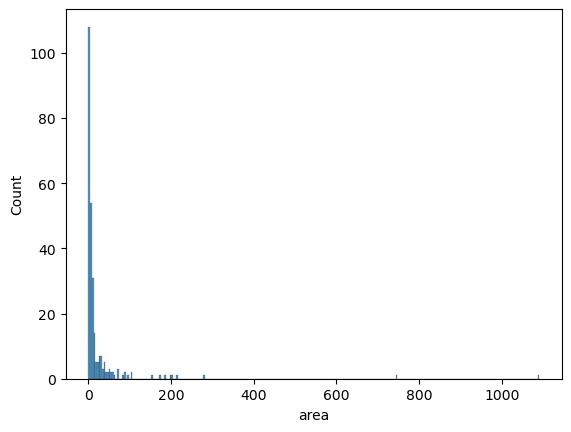

In [17]:
# Histplot for area without 0 values
sns.histplot(x = df[df.area != 0].area)

Ignoring 0 value for area, the distribution is still heavily skewed with majority of the samples having very small values

C:\Users\harsh\AppData\Local\Temp\ipykernel_8992\3972453582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

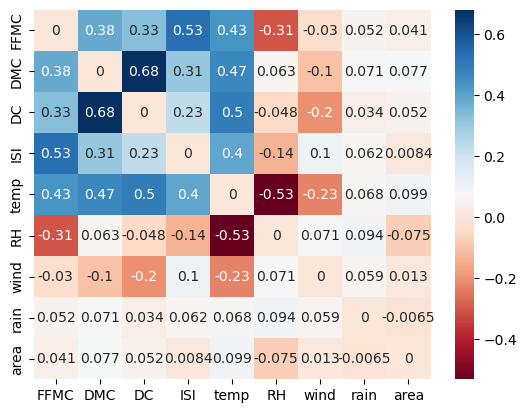

In [18]:
# Plotting correlation between features
corr_matrix = df.corr()
np.fill_diagonal(corr_matrix.values, 0)
sns.heatmap(corr_matrix, annot = True, cmap= 'RdBu')

temp are RH are negatively correlated. DC and DMC, ISI and FFMC, temp and DMC, temp and DC are positively correlated. temp seems to be positively or negatively correlated with a lot of features

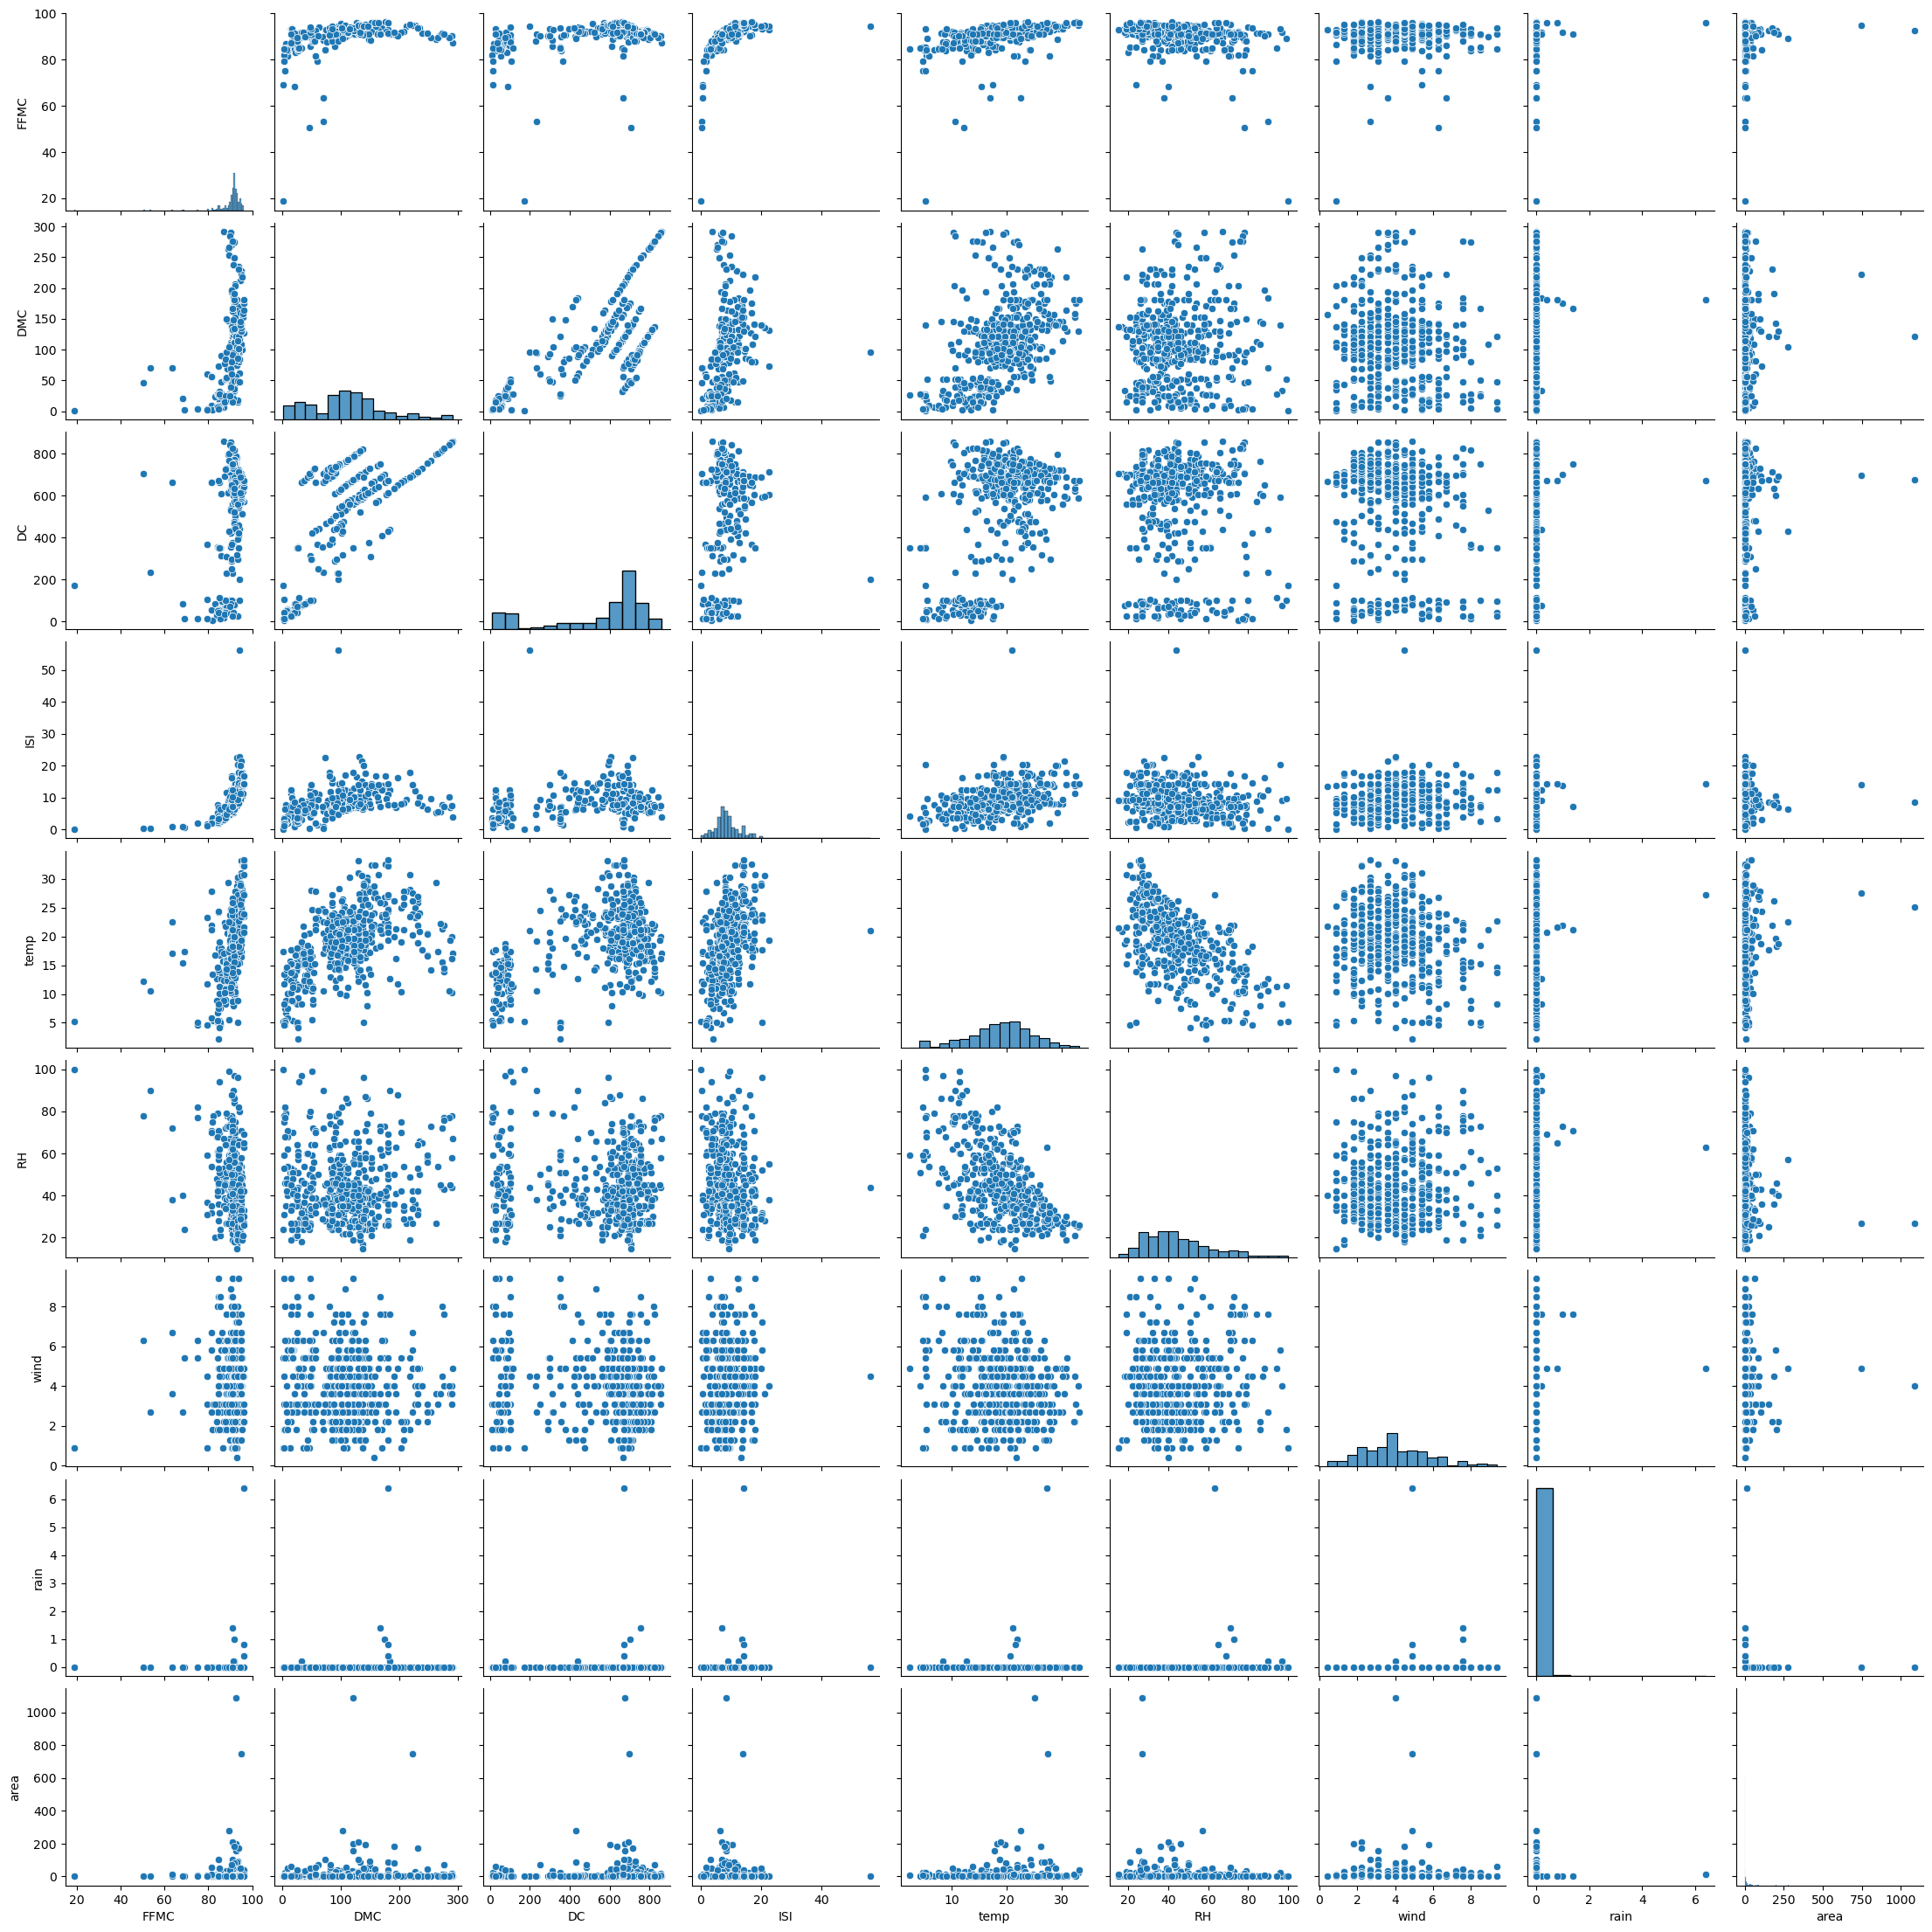

In [19]:
# Getting pairplot
sns.pairplot(df)

In [20]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [21]:
# Getting distribution by size_category for each feature
for col in df.columns:
    print(col)
    print(df.groupby('size_category')[col].agg(['describe']).T)
    print()

month
size_category   large small
describe count    138   371
         unique    10    12
         top      sep   aug
         freq      51   135

day
size_category   large small
describe count    138   371
         unique     7     7
         top      sun   sun
         freq      27    67

FFMC
size_category        large       small
describe count  138.000000  371.000000
         mean    90.839130   90.535849
         std      4.110578    6.007818
         min     63.500000   18.700000
         25%     90.300000   90.200000
         50%     91.600000   91.600000
         75%     93.250000   92.600000
         max     96.100000   96.200000

DMC
size_category        large       small
describe count  138.000000  371.000000
         mean   115.105797  108.424259
         std     67.948994   62.190240
         min      3.600000    1.100000
         25%     56.700000   70.250000
         50%    118.450000  105.800000
         75%    141.300000  141.300000
         max    290.000000  291.300

## Feature Engineering

Let us one hot encode categorical features :

In [22]:
# Converting target feature into binary
df.size_category.replace({'small':0, 'large':1}, inplace=True)

In [23]:
df = pd.get_dummies(df, columns = ['day', 'month'])

In [24]:
continuous_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

In [25]:
# Standardizing continuous features
from sklearn.preprocessing import MinMaxScaler
df[continuous_cols] = MinMaxScaler().fit_transform(df[continuous_cols])

We will drop area feature as it is the feature from which size_category has been derived : 

In [26]:
df.drop(columns = ['area'], inplace=True)

## Hyperparameter Tuning

In [27]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Input, Add
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy, binary_crossentropy

from keras.wrappers.scikit_learn import KerasClassifier

In [28]:
# Setting a seed value for random so that we get the same output for random operations each time
tf.random.set_seed(42)

In [29]:
# Separating dependent and independent variables
X = df.drop(columns = ['size_category'])
y = df.size_category

In [30]:
# Splitting data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

In [31]:
# Checking if GPU is recognized by tensorflow
GPUs = tf.config.list_physical_devices('GPU')
print(f"Number of GPUs : {len(GPUs)}")

# Setting tensorflow to not allot entire GPU memory for operations, but rather use little of its memory as and when needed
tf.config.experimental.set_memory_growth(GPUs[0], True)

Number of GPUs : 1


In [32]:
# class distribution in training set target
train_y.value_counts()

0    297
1    110
Name: size_category, dtype: int64

- As we have an imbalanced dataset, we will use imblearn to use an over sampling technique to equalize class weights 
- There are no concrete guidelines to estimate the number of layers and nodes in the model. It is best to start with 1 or 2 layers, with an arbitrary number of nodes, and scale both through trial and error based on reducing loss and increasing accuracy. We will also pay attention to confusion matrix and roc curve
- Technically a single layer can map any function to an output, but it will require a large number of nodes. If it is complicated to derive patterns from the dataset, multiple layers will do a better and quicker job. However, as number of layers increases, so does overfitting
- Having a high number of nodes also leads to overfitting
- Having a low number of nodes or layers, will lead to underfitting
- Through multiple trials we can arrive at a near optimal area
- As we have a very small data set, it is prudent to have a small number of layers and nodes, as the model can very easily overfit to the data
- If batch size is low, our score with jitter, which means underfitting. Rule of thumb: set batch size to 1% of data size. If class weights are used, larger batch sizes are better

In [34]:
# Upsampling training data to balance class weights
from imblearn.over_sampling import ADASYN
train_X, train_y = ADASYN().fit_resample(train_X, train_y)

In [35]:
# Checking value counts for training target
train_y.value_counts()

0    297
1    275
Name: size_category, dtype: int64

Lets create a basic model with moderate hyperparameters

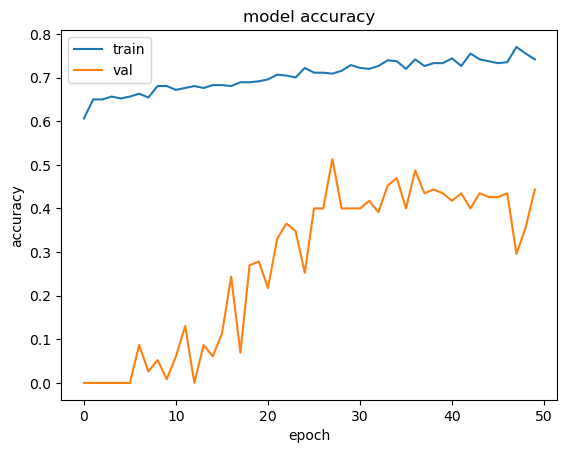

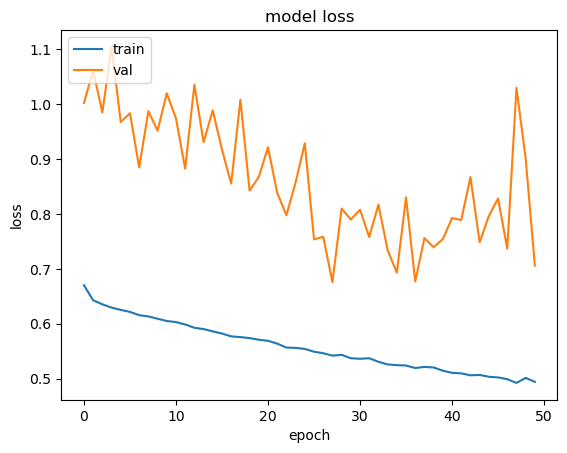

4/4 [==============================] - 0s 5ms/step


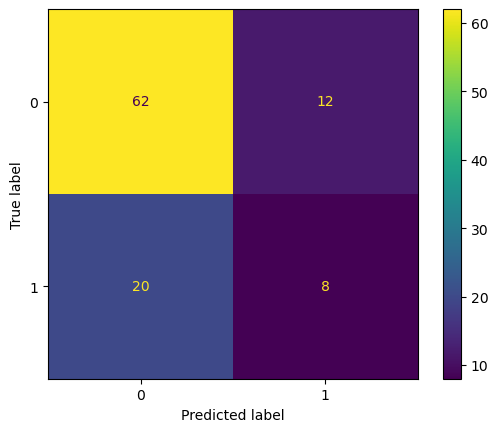

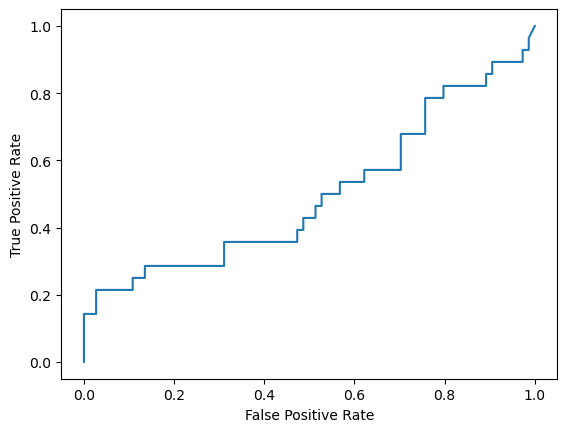

In [36]:
# Creating a NN model with sequential layers with densely interconnected nodes
model = Sequential([
    Dense(units = 64, input_shape = (train_X.shape[1],), activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = 'accuracy')

# Fitting training data to the model
history = model.fit(x=train_X, y = train_y, epochs = 50, batch_size = 4, validation_split=0.2, verbose = 0)


def display_results():
    # Plotting the Accuracy for Training and Validation sets
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plotting the loss for Training and Validation sets
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    probs = model.predict(test_X)
    # convert probability predictions to binary predictions
    preds = (probs > 0.5).astype(int)
    ConfusionMatrixDisplay(confusion_matrix(test_y, preds)).plot()
    fpr,tpr,thresholds = roc_curve(test_y, probs)
    RocCurveDisplay(fpr = fpr, tpr = tpr).plot()
    
display_results()

We have a large number of both false positives and false negatives. Let's try increasing the number of layers

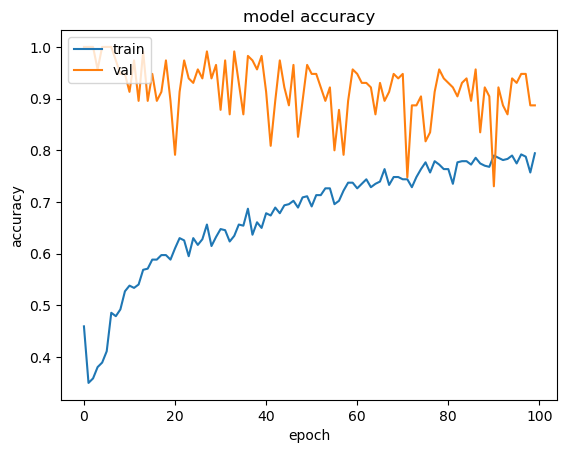

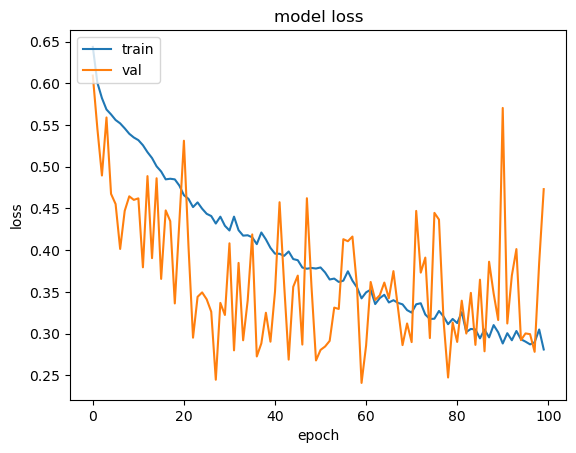

4/4 [==============================] - 0s 5ms/step


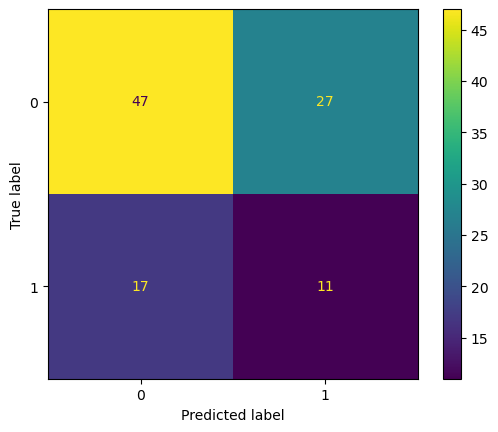

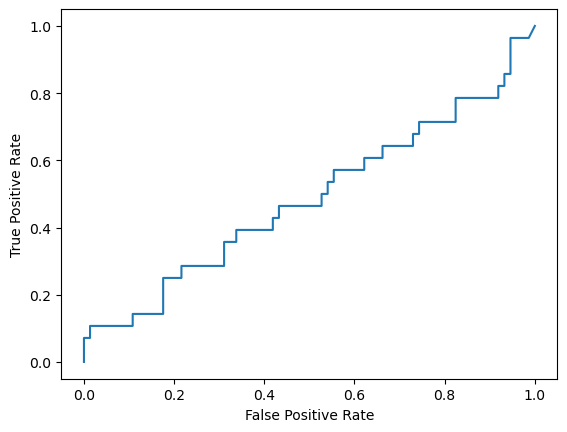

In [37]:
# Creating a NN model with sequential layers with densely interconnected nodes
model = Sequential([
    Dense(units = 128, input_shape = (train_X.shape[1],), activation = 'relu'),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 4, kernel_regularizer = 'l2', activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = 'accuracy')

# Fitting training data to the model
history = model.fit(x=train_X, y = train_y, epochs = 100, batch_size = 4,  validation_split=0.2, verbose = 0, class_weight = {0:0.5, 1:1.5})
    
display_results()

We face the same problem with additional layers as well. ROC curve suggests our model is no better than random chance.  
Lets try hyperparameter search using keras tuner random search to find few optimal values

In [38]:
import keras_tuner
from tensorflow.keras.regularizers import l2

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(27,)))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=4, max_value=128, step=4),
                kernel_regularizer = l2(hp.Float("l2_value", min_value=0.001, max_value=1, step=0.001)),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.1))
    model.add(Dense(1, activation="sigmoid"))
    learning_rate = hp.Float("learning_rate", min_value=0.000001, max_value=1, sampling="log")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=25,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="nn",
)

tuner.search(train_X, train_y, epochs= 50, batch_size= 8, validation_data=(test_X, test_y))

Trial 25 Complete [00h 02m 03s]
val_accuracy: 0.725490152835846

Best val_accuracy So Far: 0.7549019157886505
Total elapsed time: 00h 44m 17s
INFO:tensorflow:Oracle triggered exit


In [39]:
# Printing hyperparameter of model sorted by validation accuracy
results = tuner.results_summary()

Results summary
Results in my_dir\nn
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 16 summary
Hyperparameters:
num_layers: 1
units_0: 40
l2_value: 0.011
activation: relu
dropout: False
learning_rate: 0.0012857220962016254
units_1: 108
units_2: 64
Score: 0.7549019157886505

Trial 17 summary
Hyperparameters:
num_layers: 2
units_0: 120
l2_value: 0.40900000000000003
activation: tanh
dropout: False
learning_rate: 6.035641038576111e-05
units_1: 104
units_2: 72
Score: 0.7352941036224365

Trial 02 summary
Hyperparameters:
num_layers: 1
units_0: 60
l2_value: 0.335
activation: tanh
dropout: True
learning_rate: 0.014443893090405877
units_1: 96
units_2: 72
Score: 0.7303921282291412

Trial 01 summary
Hyperparameters:
num_layers: 3
units_0: 96
l2_value: 0.97
activation: relu
dropout: False
learning_rate: 0.010292276079899824
units_1: 16
units_2: 4
Score: 0.725490152835846

Trial 05 summary
Hyperparameters:
num_layers: 3
units_0: 88
l2_value: 0.34400000000000003
activa

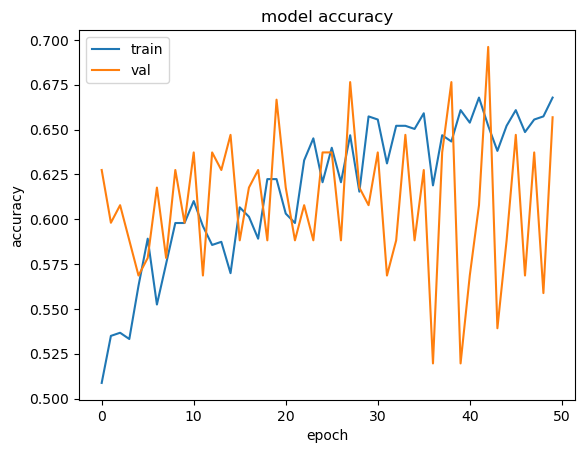

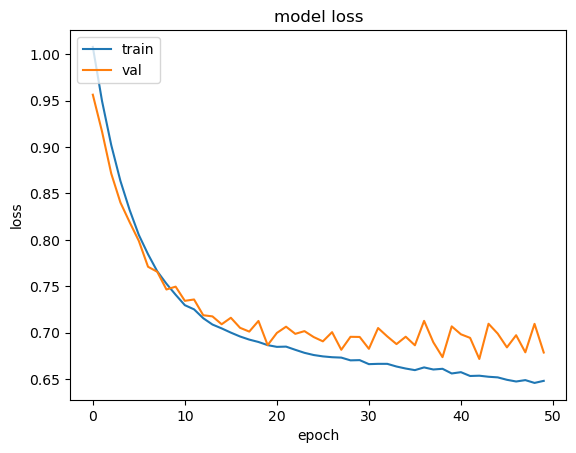

4/4 [==============================] - 0s 4ms/step


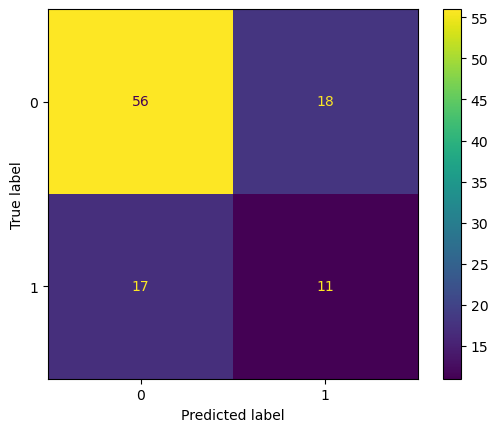

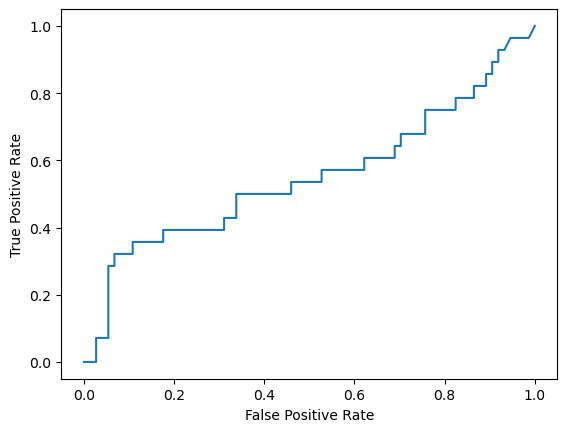

In [40]:
# Creating a NN model which gave the best score in randomized search
model = Sequential([
    Dense(units = 40, input_shape = (train_X.shape[1],),kernel_regularizer = l2(0.01), activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.0012857220962016254), loss = 'binary_crossentropy', metrics = 'accuracy')

# Fitting training data to the model
history = model.fit(x=train_X, y = train_y, epochs = 50, validation_data=(test_X, test_y), verbose = 0)
    
display_results()

Even with the best score, we're not able to minimize classification errors. This loss function does not seem to be very useful for this dataset. Lets try to create a loss function which will try to reduce errors

In [75]:
from keras import backend as K

# Cost Function which return ratio of absolute difference of errors and sum of errors
# We expect this cost function to drive down the errors, without driving one to zero and other to a higher value
def reduce_clf_err(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    #y_pred = K.cast(K.round(y_pred), 'int64')
    tn = K.sum(K.round(K.clip((1-y_true)*(1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true)*y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true*(1-y_pred), 0, 1)))
    tp = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    err_for_0 = fp / (fp + tn)
    err_for_1 = fn / (fn + tp)
    relative_errors = K.abs(err_for_0 - err_for_1) / K.abs(err_for_0 + err_for_1)
    return relative_errors

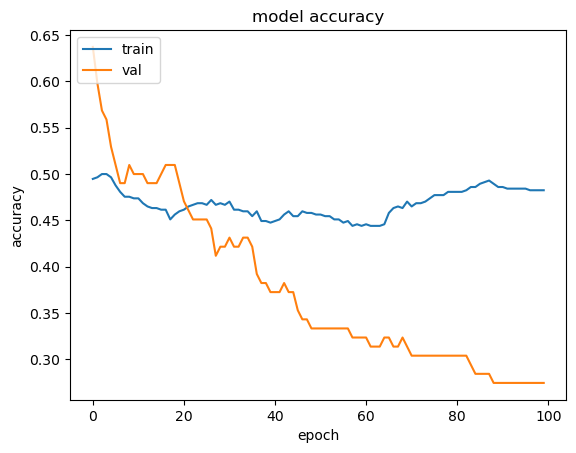

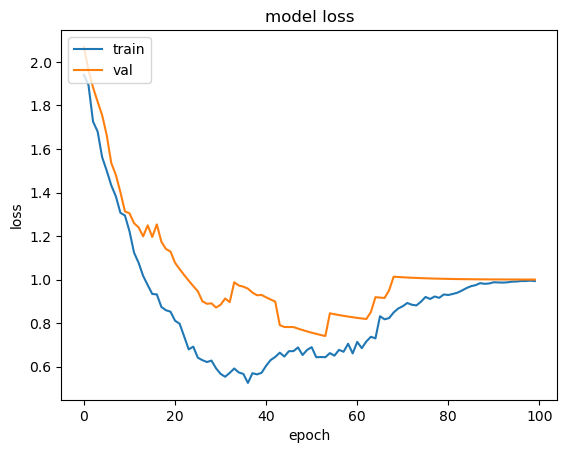

4/4 [==============================] - 0s 6ms/step


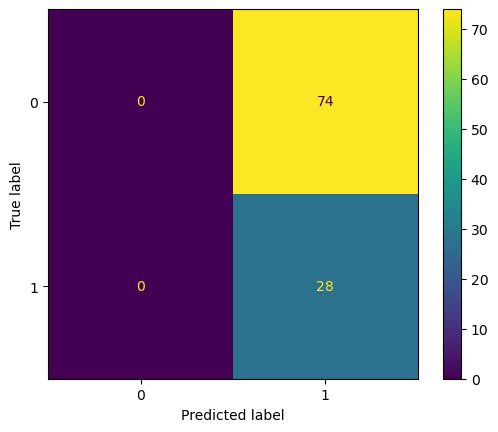

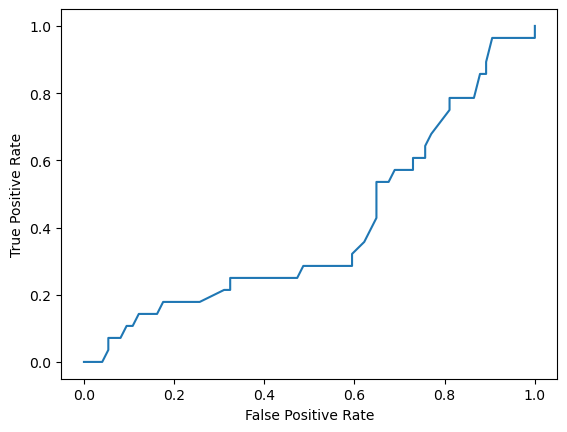

In [88]:
# Creating a NN model using the new loss function
model = Sequential([
    Dense(units = 64, input_shape = (train_X.shape[1],),kernel_regularizer = l2(0.001), activation = 'relu'),
    Dense(units = 8, kernel_regularizer = l2(0.1), activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = reduce_clf_err, metrics = 'accuracy')

# Fitting training data to the model
history = model.fit(x=train_X, y = train_y, epochs = 100, batch_size = 12, validation_data=(test_X, test_y), verbose = 0)
    
display_results()

This has not worked either. We either get complete misclassification in one of the labels or 50% accuracy which is no better than chance. Lets try doing a random search using this loss function

In [90]:
import keras_tuner
from tensorflow.keras.regularizers import l2

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(27,)))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=4, max_value=128, step=4),
                kernel_regularizer = l2(hp.Float("l2_value", min_value=0.001, max_value=1, step=0.001)),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.1))
    model.add(Dense(1, activation="sigmoid"))
    learning_rate = hp.Float("learning_rate", min_value=0.000001, max_value=1, sampling="log")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=reduce_clf_err,
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=25,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="nn",
)

tuner.search(train_X, train_y, epochs= 50, batch_size= 8, validation_data=(test_X, test_y))

Trial 25 Complete [00h 01m 45s]
val_accuracy: 0.7450979948043823

Best val_accuracy So Far: 0.7647058367729187
Total elapsed time: 00h 44m 30s
INFO:tensorflow:Oracle triggered exit


In [91]:
results = tuner.results_summary()

Results summary
Results in my_dir\nn
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
num_layers: 2
units_0: 92
l2_value: 0.79
activation: relu
dropout: True
learning_rate: 0.026222907156960587
units_1: 20
units_2: 4
Score: 0.7647058367729187

Trial 04 summary
Hyperparameters:
num_layers: 3
units_0: 104
l2_value: 0.016
activation: relu
dropout: True
learning_rate: 0.09165670235151255
units_1: 124
units_2: 48
Score: 0.7450979948043823

Trial 10 summary
Hyperparameters:
num_layers: 1
units_0: 56
l2_value: 0.063
activation: tanh
dropout: True
learning_rate: 0.003342123566437515
units_1: 8
units_2: 120
Score: 0.7450979948043823

Trial 13 summary
Hyperparameters:
num_layers: 2
units_0: 12
l2_value: 0.23700000000000002
activation: relu
dropout: True
learning_rate: 0.10772285169397046
units_1: 8
units_2: 40
Score: 0.7450979948043823

Trial 24 summary
Hyperparameters:
num_layers: 1
units_0: 68
l2_value: 0.154
activation: relu
dropout: Tr

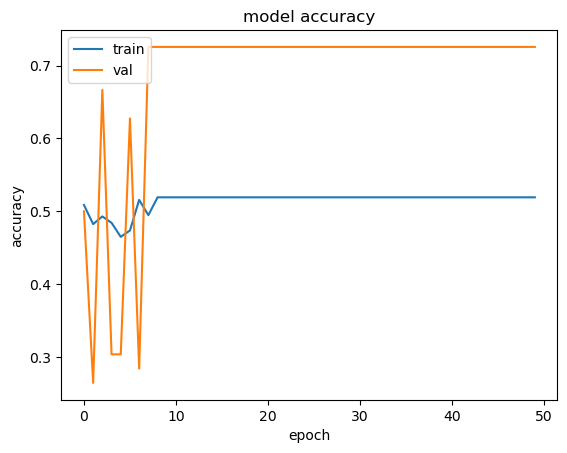

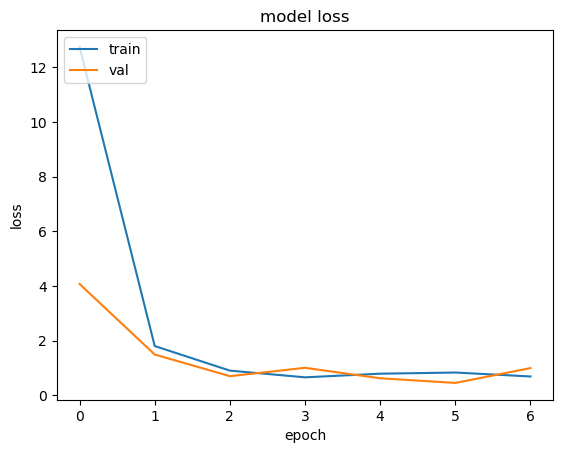

4/4 [==============================] - 0s 4ms/step


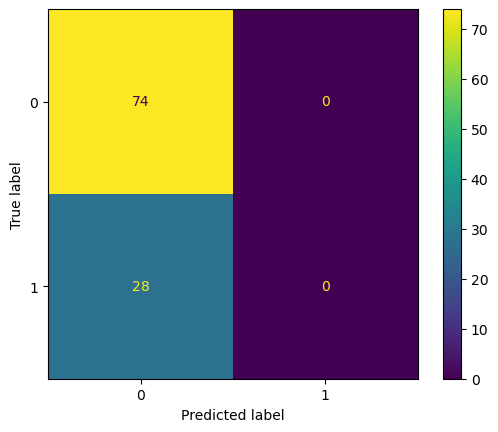

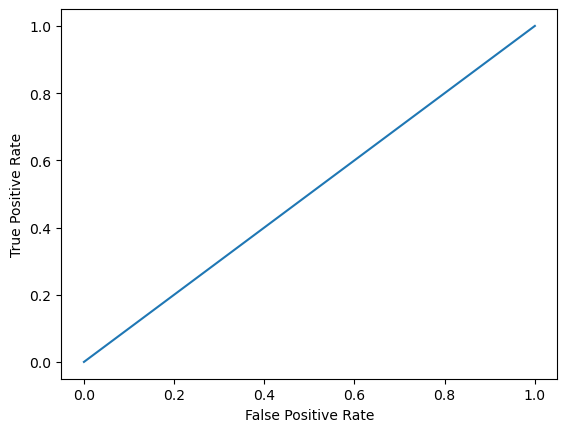

In [94]:
# Creating a NN model which gave the best score in randomized search
model = Sequential([
    Dense(units = 92, input_shape = (train_X.shape[1],),kernel_regularizer = l2(0.8), activation = 'relu'),
    Dense(units = 20, kernel_regularizer = l2(0.8), activation = 'relu'),
    Dropout(0.1),
    Dense(units = 1, activation = 'sigmoid')
])

# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.025), loss = reduce_clf_err, metrics = 'accuracy')

# Fitting training data to the model
history = model.fit(x=train_X, y = train_y, epochs = 50, validation_data=(test_X, test_y), verbose = 0)
    
display_results()

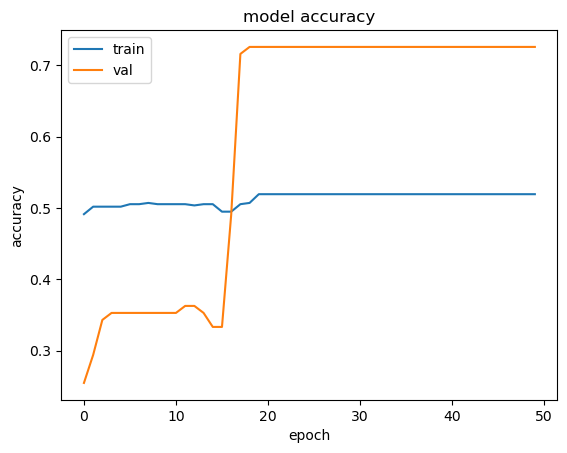

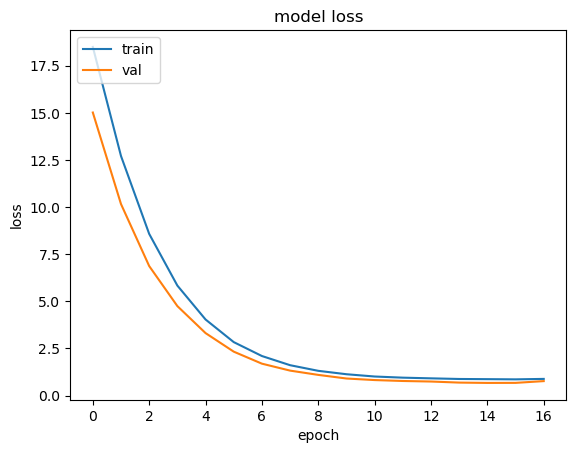

4/4 [==============================] - 0s 5ms/step


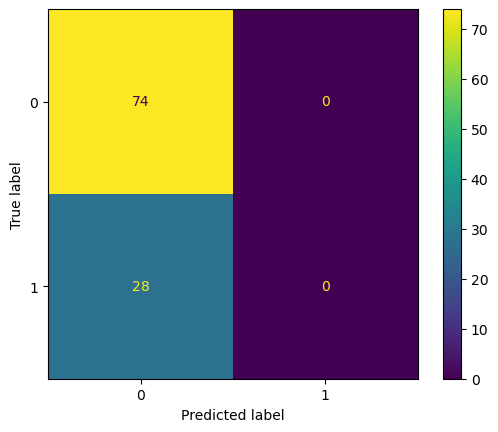

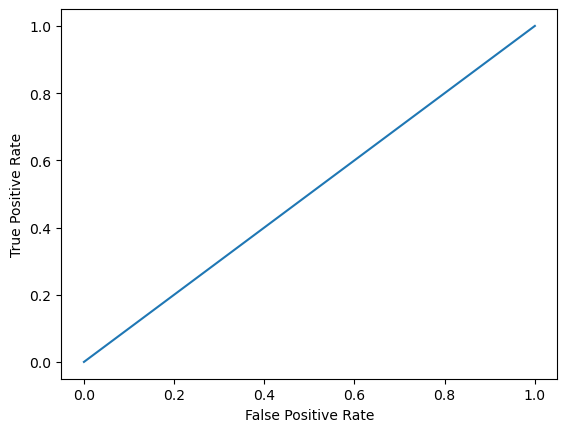

In [95]:
# Creating a NN model which gave the 10th best score in randomized search
model = Sequential([
    Dense(units = 56, input_shape = (train_X.shape[1],),kernel_regularizer = l2(0.25), activation = 'tanh'),
    Dense(units = 16, kernel_regularizer = l2(0.25), activation = 'tanh'),
    Dense(units = 32, kernel_regularizer = l2(0.25), activation = 'tanh'),
    Dense(units = 1, activation = 'sigmoid')
])

# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.002), loss = reduce_clf_err, metrics = 'accuracy')

# Fitting training data to the model
history = model.fit(x=train_X, y = train_y, epochs = 50, validation_data=(test_X, test_y), verbose = 0)
    
display_results()

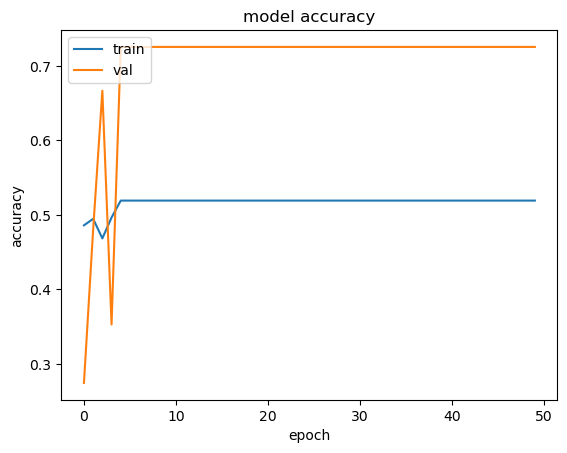

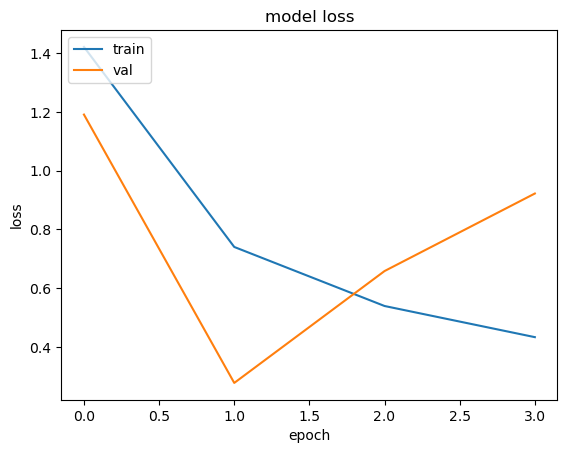

4/4 [==============================] - 0s 4ms/step


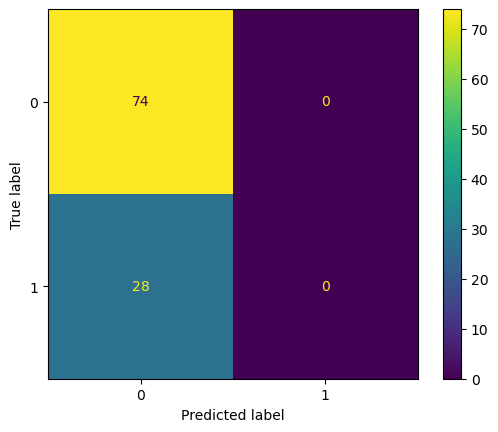

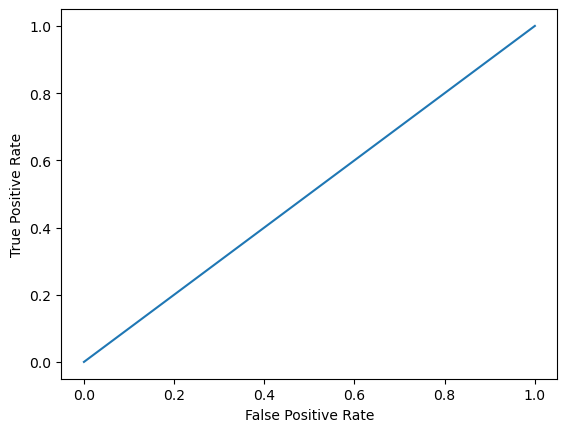

In [97]:
# Creating a NN model which gave the 2nd best score in randomized search
model = Sequential([
    Dense(units = 104, input_shape = (train_X.shape[1],),kernel_regularizer = l2(0.016), activation = 'relu'),
    Dense(units = 124, kernel_regularizer = l2(0.016), activation = 'relu'),
    Dense(units = 48, kernel_regularizer = l2(0.016), activation = 'relu'),
    Dropout(0.1),
    Dense(units = 1, activation = 'sigmoid')
])

# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.09), loss = reduce_clf_err, metrics = 'accuracy')

# Fitting training data to the model
history = model.fit(x=train_X, y = train_y, epochs = 50, validation_data=(test_X, test_y), verbose = 0)
    
display_results()

All the models seem to classify every sample in testing set as 0 or 1

## Conclusion

- We have a very small dataset which might not be suitable for neural networks
- Our dataset is very imbalanced
- We've used ADASYN to balance the target classes in the training set
- Trying multiple hyperparameter combinations, we were only able to distribute errors between type 1 or type 2, but not able to bring the number of total errors down
- We wrote a cost function to reduce total errors, by using a ratio of absolute difference of errors and sum of errors. We did this to avoid driving one type of error to 0 and increasing another to an even higher value
- We failed to reduce total error with this cost function as even with hyperparameter tuning and trying multiple combinations of hyperparameters, we get models that classify all samples in test set to either 0 or 1.
- After checking multiple resources on youtube, github, and kaggle that work on the same dataset, I've noticed that everyone is using area column as a feature. However, as the target variable is derived from area, it would be incorrect to use it as a feature. With area feature, very high accuracy is attained which is obvious
- Neural networks seem to be not suitable for this dataset. Tree based models might work better here